In [1]:
import pandas as pd
df_train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')
df_test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_test.csv')

In [3]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train = df_train[['GrLivArea','LotArea','SalePrice']]
df_test = df_test[['GrLivArea','LotArea']]
df_train

,GrLivArea,LotArea,SalePrice
0,1710,8450,208500
1,1262,9600,181500
2,1786,11250,223500
3,1717,9550,140000
4,2198,14260,250000
...,...,...,...
1455,1647,7917,175000
1456,2073,13175,210000
1457,2340,9042,266500
1458,1078,9717,142125


In [8]:
df_train['SalePrice'].min(), df_train['SalePrice'].max(), df_train['SalePrice'].mean(), df_train['SalePrice'].median()

(34900, 755000, 180921.19589041095, 163000.0)

In [13]:
pd.set_option('display.float_format', '{:,.1f}'.format)

# pd.set_option('display.float_format', None)

In [14]:
df_train['SalePrice'].describe()

count     1,460.0
mean    180,921.2
std      79,442.5
min      34,900.0
25%     129,975.0
50%     163,000.0
75%     214,000.0
max     755,000.0
Name: SalePrice, dtype: float64

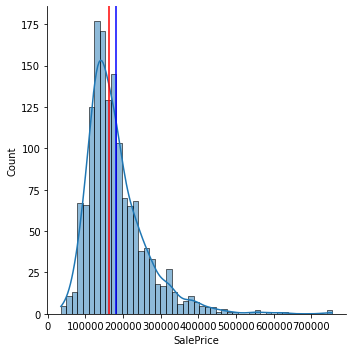

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df_train['SalePrice'], kde=True)

plt.axvline(df_train['SalePrice'].mean(), color='blue')
plt.axvline(df_train['SalePrice'].median(), color='red');

In [20]:
predict = df_train['SalePrice'].mean()
predict


180921.19589041095

In [22]:
errors = predict - df_train['SalePrice']
errors

0      -27,578.8
1         -578.8
2      -42,578.8
3       40,921.2
4      -69,078.8
          ...   
1455     5,921.2
1456   -29,078.8
1457   -85,578.8
1458    38,796.2
1459    33,421.2
Name: SalePrice, Length: 1460, dtype: float64

In [24]:
mean_absolute_error = errors.abs().mean()
mean_absolute_error

57434.770275849274

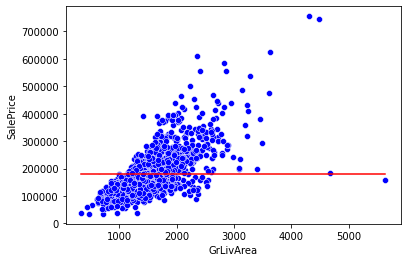

In [29]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

predict = df_train['SalePrice'].mean()
errors = predict - df_train['SalePrice']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [30]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $180,921이며 절대평균에러가 $57,435임을 확인할 수 있습니다.


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

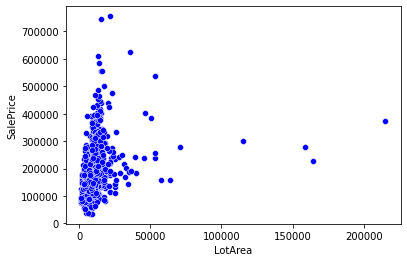

In [32]:
# plt.scatter(df_train['LotArea'], df_train['SalePrice'])
sns.scatterplot(x=df_train['LotArea'], y=df_train['SalePrice'], color='blue')

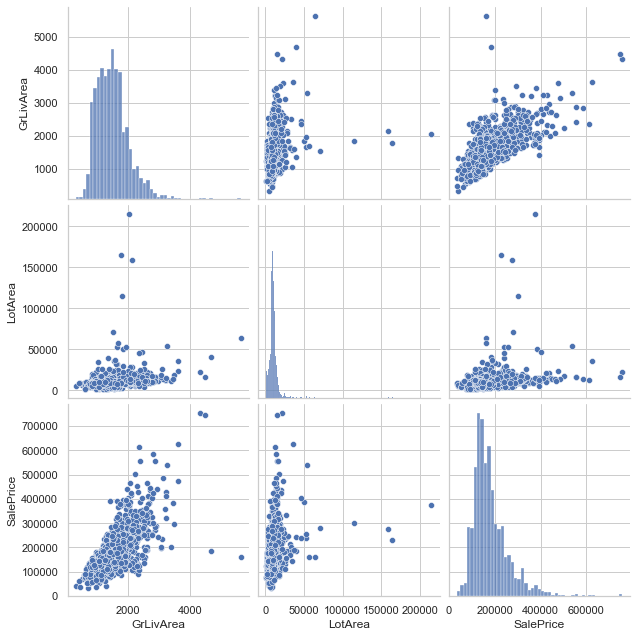

In [34]:
sns.set(style='whitegrid', context='notebook')
cols = ['GrLivArea','LotArea','SalePrice']
sns.pairplot(df_train[cols], height=3);

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

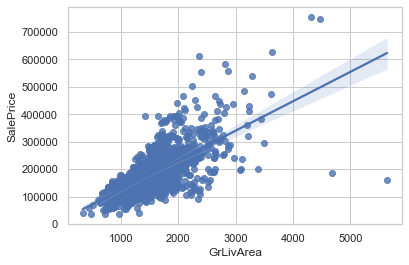

In [35]:
sns.regplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])

In [37]:
df_train[(df_train['GrLivArea'] > 3500) & (df_train['GrLivArea'] < 4500)]

,GrLivArea,LotArea,SalePrice
185,3608,22950,475000
691,4316,21535,755000
1169,3627,35760,625000
1182,4476,15623,745000


In [41]:
df_train[(df_train['GrLivArea'] > 6000)].sort_values('GrLivArea')

,GrLivArea,LotArea,SalePrice


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()

In [45]:
feature = ['GrLivArea']
target = ['SalePrice']
X_train = df_train[feature]
y_train = df_train[target]

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
X_test = [[4000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

4000 sqft GrLivArea를 가지는 주택의 예상 가격은 $447090 입니다.


In [77]:
X_test = [[x] for x in df_test['GrLivArea']]
y_pred = model.predict(X_test)

In [61]:
y_pred

array([[114557.82748987],
       [160945.27292207],
       [193084.38061182],
       ...,
       [149696.58523066],
       [122485.47405334],
       [232829.74378814]])

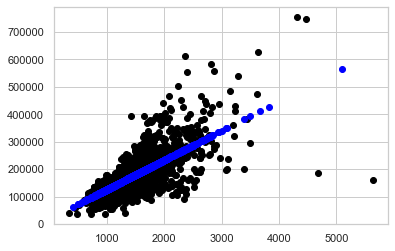

In [65]:
plt.scatter(X_train, y_train, color='Black', linewidth=1)
plt.scatter(X_test, y_pred, color='blue', linewidths=1);

In [66]:
model.coef_

array([[107.13035897]])

In [67]:
model.intercept_

array([18569.02585649])

In [81]:
def explain_prediction(sqft):
    y_pred = model.predict([[sqft]])
    pred = f'{int(sqft)} sqft 주택 가격 예측 : ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})'
    return pred
    

In [82]:
print(explain_prediction(4000))

4000 sqft 주택 가격 예측 : $447090 (1 sqft당 추가금: $107)


In [83]:
from ipywidgets import interact

@interact
def explain_prediction(sqft=(500,10000)):
    y_pred = model.predict([[sqft]])
    pred = f'{int(sqft)} sqrt 주택 가격 예측 : ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})'
    return pred

interactive(children=(IntSlider(value=5250, description='sqft', max=10000, min=500), Output()), _dom_classes=(…